# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grades

## Learning Objective

The objective of this experiment is to understand Decision tree classifier and overfitting

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="3_DecisionTree_Random_Trace" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch") 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/A.csv.zip")
    ipython.magic("sx unzip A.csv.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/B.csv.zip")
    ipython.magic("sx unzip B.csv.zip")
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/C.csv.zip")
    ipython.magic("sx unzip C.csv.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



#### Importing the required packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
import os
import warnings
warnings.filterwarnings('ignore')

#### Loading the data

In [0]:
C_data = pd.read_csv("C.csv").values

In [0]:
Testing_data =pd.read_csv("B.csv").values


To get more sense of data. let us plot the data

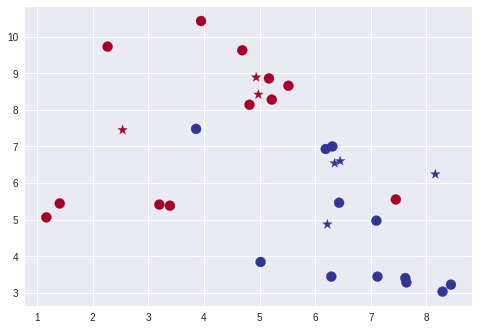

In [0]:
plt.scatter(C_data[:,0], C_data[:,1], c=C_data[:,2], cmap=plt.cm.RdYlBu, s=100)
plt.scatter(Testing_data[:,0], Testing_data[:,1], c=Testing_data[:,2], cmap=plt.cm.RdYlBu, marker="*", s=100)
plt.show()

In [0]:
# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

In [0]:
Depth = 7

In [0]:
x_min, x_max = C_data[:, 0].min() - 1, C_data[:, 0].max() + 1
y_min, y_max = C_data[:, 1].min() - 1, C_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
X = C_data[:, [0,1]]
y = C_data[:,2]

Training Accuracy: 0.88 Testing Accuracy: 1.0  At Depth: 1


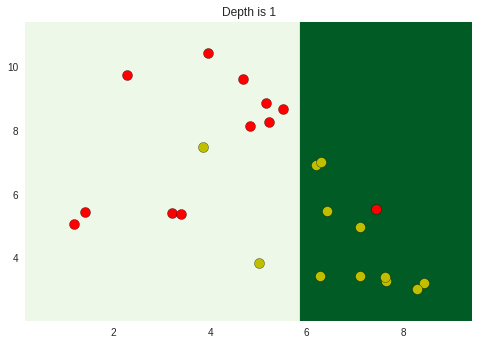

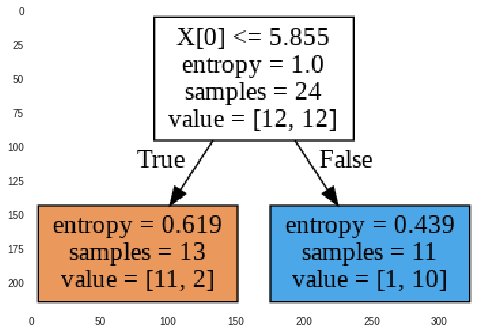

Training Accuracy: 0.92 Testing Accuracy: 1.0  At Depth: 2


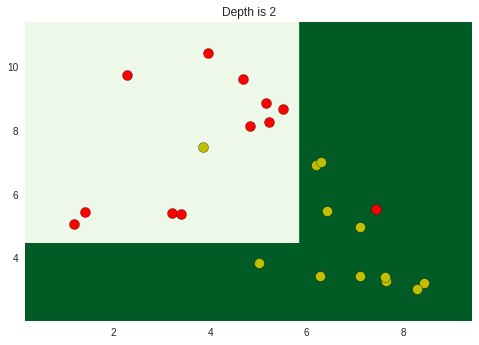

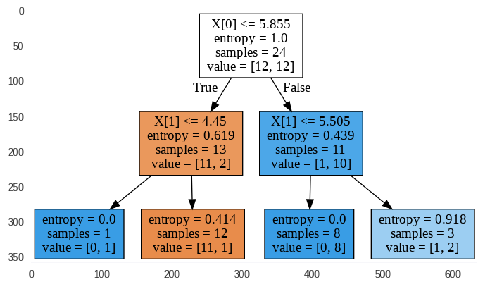

Training Accuracy: 0.96 Testing Accuracy: 0.86  At Depth: 3


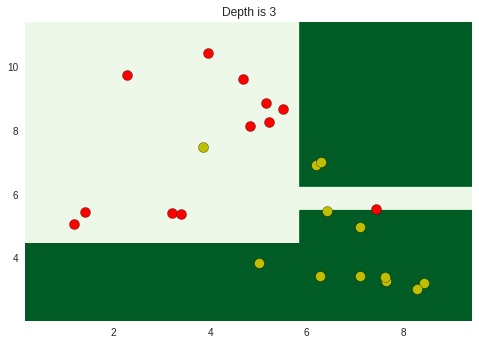

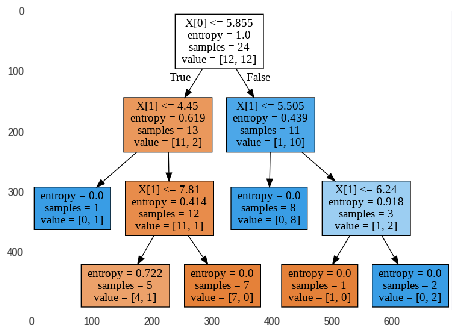

Training Accuracy: 1.0 Testing Accuracy: 0.71  At Depth: 4


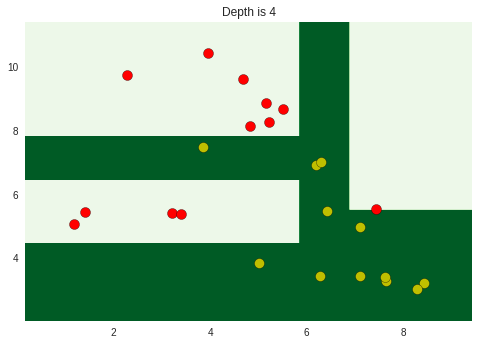

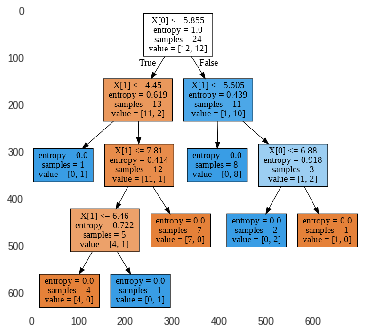

Training Accuracy: 1.0 Testing Accuracy: 0.71  At Depth: 5


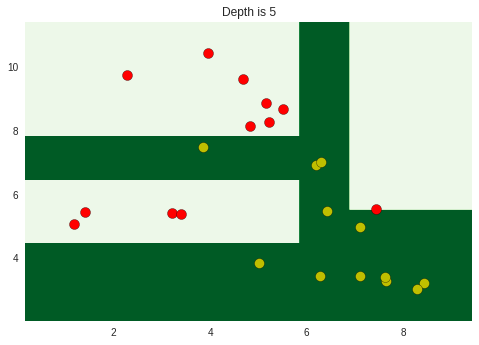

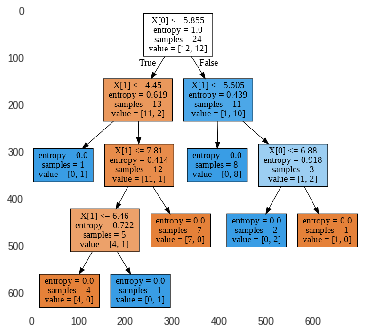

Training Accuracy: 1.0 Testing Accuracy: 0.86  At Depth: 6


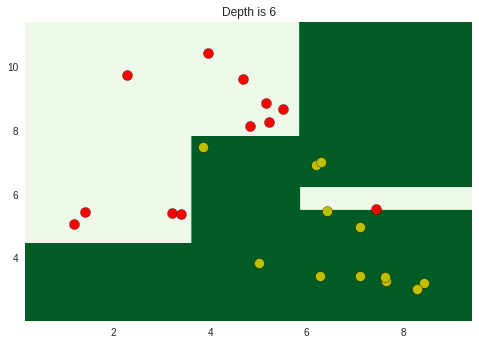

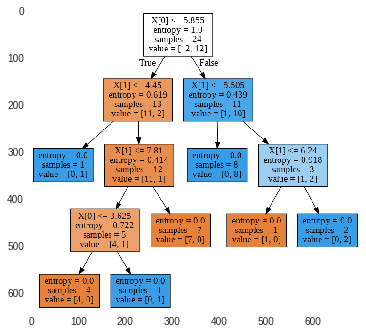

In [0]:

for depth in range(1,Depth):
    plt.grid(False)
    # Train
    clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy').fit(X, y)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(X),y),2)) + " " + "Testing Accuracy: " + str(round(accuracy_score(clf.predict(Testing_data[:,[0,1]]),Testing_data[:,2]),2)) + " " + " At Depth: " + str(depth))
    saveAs = "random_dt" + str(depth) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    # Plot the decision boundary
    #plt.subplot(2, 3, depth)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)
    plt.title("Depth is" + " " + str(depth))
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
        plt.grid(False)
        #Image(graph.create_png())
    plt.grid(False)
    plt.show()
    plt.grid(False)
    plt.imshow(plt.imread(save_png))
    plt.show()

In [0]:
A_data = pd.read_csv("A.csv").values

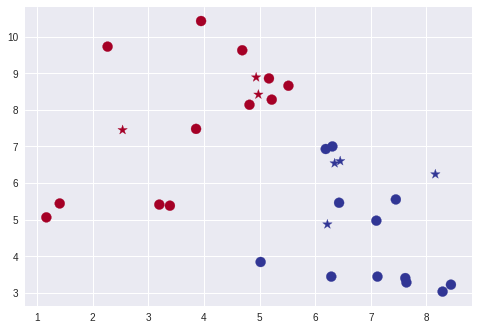

In [0]:
plt.scatter(A_data[:,0], A_data[:,1], c=A_data[:,2], cmap=plt.cm.RdYlBu, s=100)
plt.scatter(Testing_data[:,0], Testing_data[:,1], c=Testing_data[:,2], cmap=plt.cm.RdYlBu, marker="*", s=100)
plt.show()

In [0]:
x_min, x_max = A_data[:, 0].min() - 1, A_data[:, 0].max() + 1
y_min, y_max = A_data[:, 1].min() - 1, A_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
XA = A_data[:, [0,1]]
yA = A_data[:,2]

Training Accuracy: 0.96 Testing Accuracy: 1.0  Given Max Depth: 1


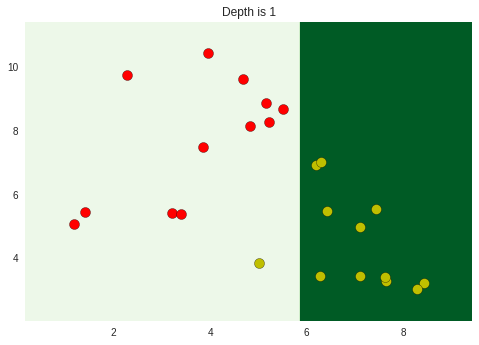

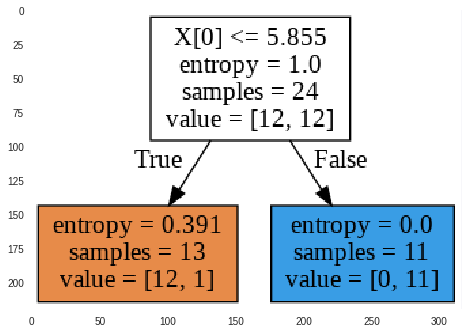

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 2


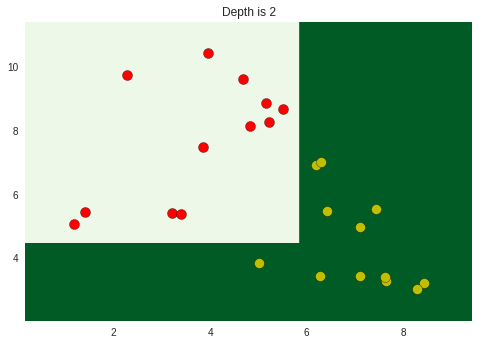

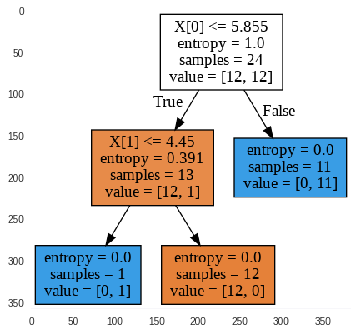

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 3


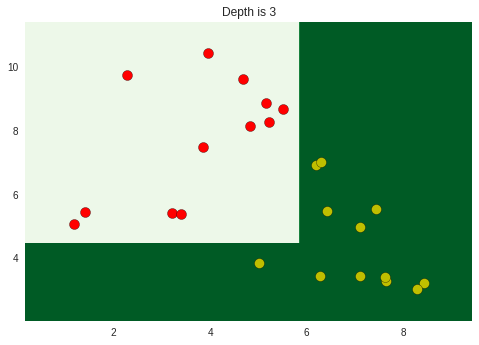

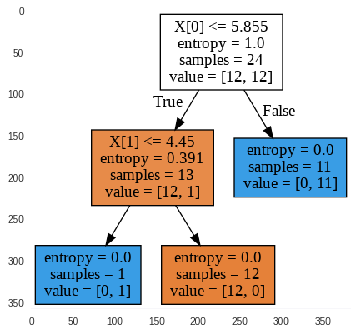

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 4


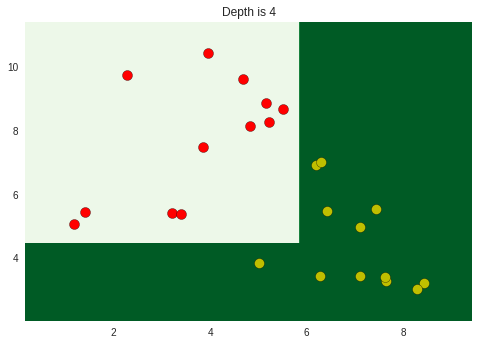

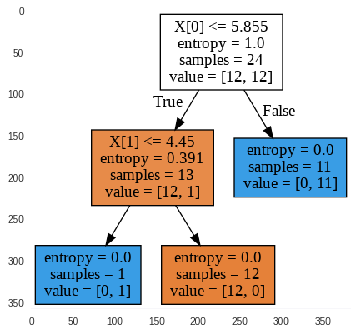

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 5


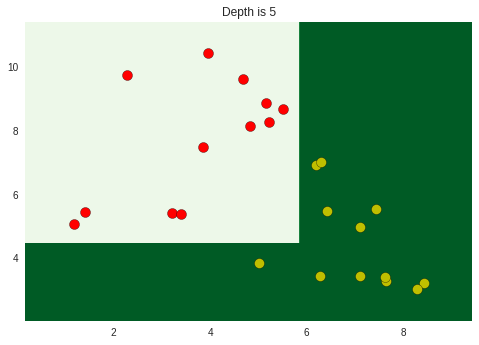

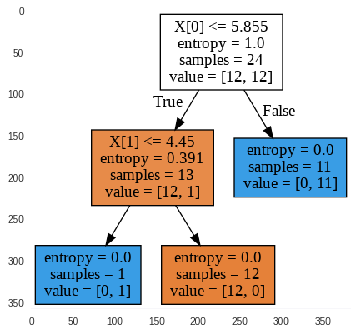

Training Accuracy: 1.0 Testing Accuracy: 1.0  Given Max Depth: 6


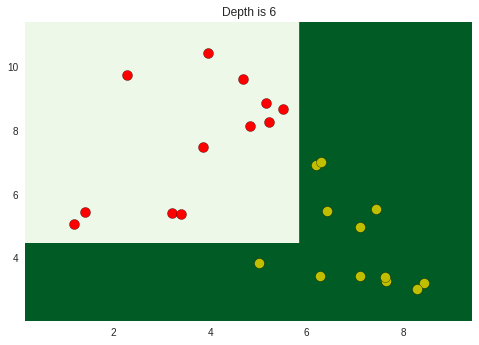

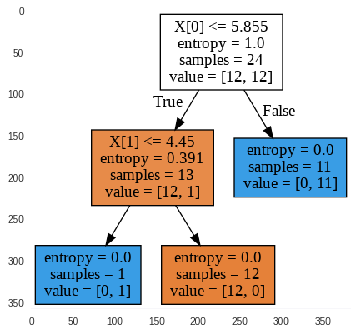

In [0]:
for depth in range(1,Depth):
    # Train
    clf = DecisionTreeClassifier(max_depth = depth,criterion='entropy').fit(XA, yA)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(A_data[:,[0,1]]),A_data[:,2]),2)) + " " + "Testing Accuracy: " + str(round(accuracy_score(clf.predict(Testing_data[:,[0,1]]),Testing_data[:,2]),2)) + " " + " Given Max Depth: " + str(depth))
    saveAs = "random_dt" + str(depth) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    # Plot the decision boundary
    #plt.subplot(2, 3, depth)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)
    plt.title("Depth is" + " " + str(depth))
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yA == i)
        plt.scatter(XA[idx, 0], XA[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
        #Image(graph.create_png())
    plt.grid(False)    
    plt.show()
    plt.grid(False)
    plt.imshow(plt.imread(save_png))
    plt.show()

In [0]:
x_min, x_max = C_data[:, 0].min() - 1, C_data[:, 0].max() + 1
y_min, y_max = C_data[:, 1].min() - 1, C_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
XC = C_data[:, [0,1]]
yC = C_data[:,2]

Training Accuracy: 0.88 Testing Accuracy: 1.0 Given Max Depth: 1


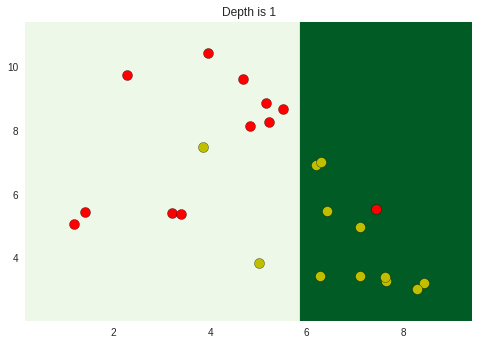

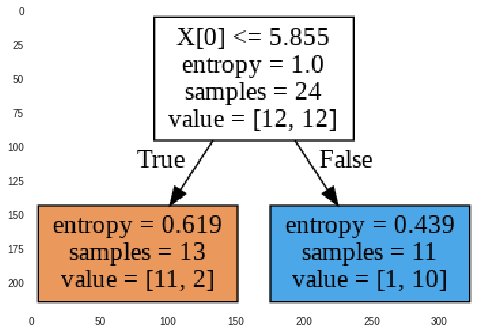

Training Accuracy: 0.92 Testing Accuracy: 1.0 Given Max Depth: 2


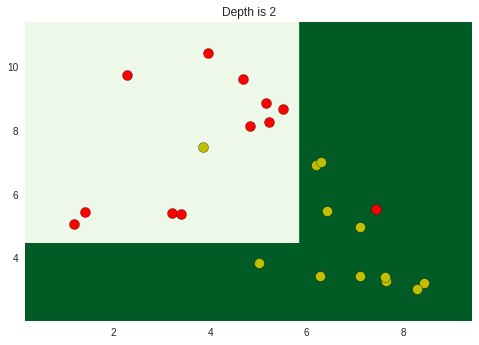

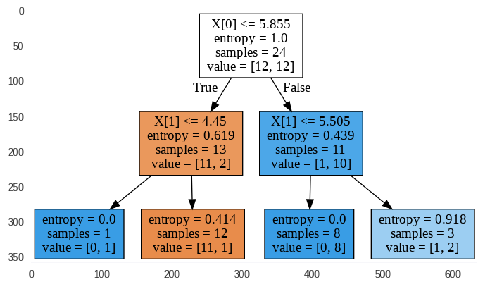

Training Accuracy: 0.96 Testing Accuracy: 0.86 Given Max Depth: 3


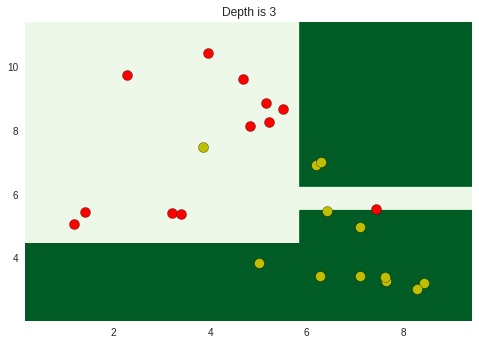

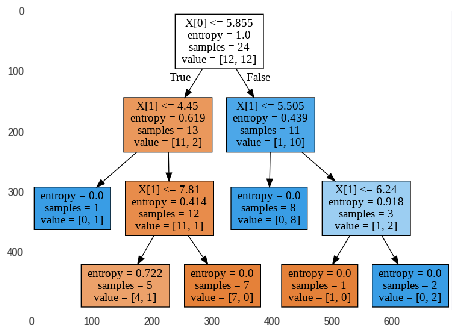

Training Accuracy: 1.0 Testing Accuracy: 0.86 Given Max Depth: 4


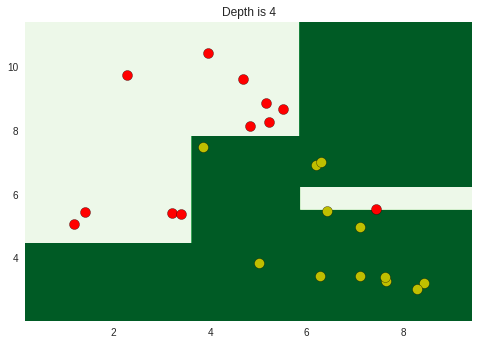

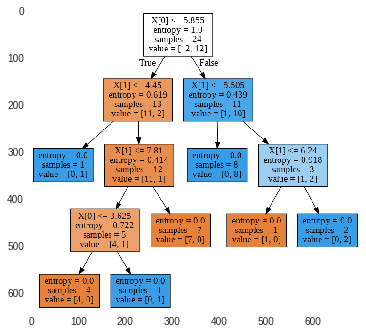

Training Accuracy: 1.0 Testing Accuracy: 0.86 Given Max Depth: 5


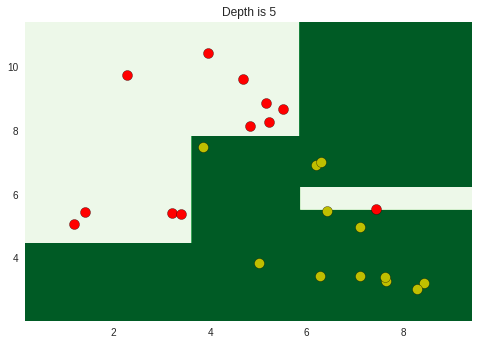

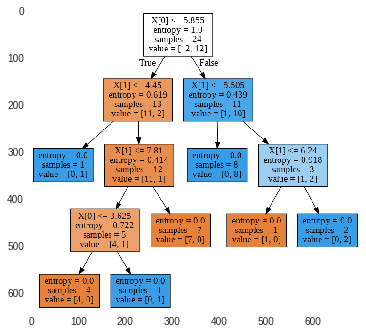

Training Accuracy: 1.0 Testing Accuracy: 0.86 Given Max Depth: 6


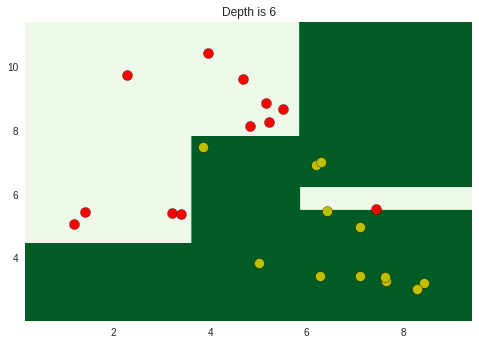

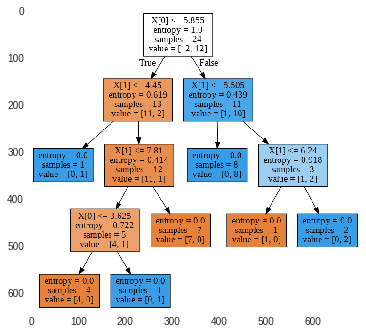

In [0]:
for depth in range(1,Depth):
    # Train
    clf = DecisionTreeClassifier(max_depth = depth, min_impurity_split = 0.2,criterion='entropy').fit(XC, yC)
    print("Training Accuracy: "+str(round(accuracy_score(clf.predict(C_data[:,[0,1]]),C_data[:,2]),2)) + " " + "Testing Accuracy: " + str(round(accuracy_score(clf.predict(Testing_data[:,[0,1]]),Testing_data[:,2]),2)) + " " + "Given Max Depth: " + str(depth))
    saveAs = "random_dt" + str(depth) 
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)
    # Plot the decision boundary
    #plt.subplot(2, 3, depth)
    #plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Greens)
    plt.title("Depth is" + " " + str(depth))
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(yC == i)
        plt.scatter(XC[idx, 0], XC[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
        #Image(graph.create_png())
    plt.grid(False)
    plt.show()
    plt.grid(False)
    plt.imshow(plt.imread(save_png))
    plt.show()

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")